# Aprendizaje neuronal de las señales de tráfico

In [1]:
import tensorflow as tf
import os
from skimage import io
import numpy as np

In [2]:
def load_ml_data(data_directory):
    dirs = [d for d in os.listdir(data_directory)
            if os.path.isdir(os.path.join(data_directory,d))]
    
    labels = []
    images = []
    for d in dirs:
        label_dir = os.path.join(data_directory, d)
        file_names = [os.path.join(label_dir, f)
                     for f in os.listdir(label_dir)
                     if f.endswith(".ppm")]
        
        for f in file_names:
            images.append(io.imread(f))
            labels.append(int(d))
        
    return images, labels          

In [3]:
main_dir = "../../datasets/belgian/"

train_data_dir = os.path.join(main_dir, "Training")
test_data_dir = os.path.join(main_dir, "Testing")

In [4]:
main_dir = "../../datasets/belgian/"
train_data_dir = os.path.join(main_dir, "Training")
test_data_dir = os.path.join(main_dir, "Testing")

In [5]:
images, labels = load_ml_data(train_data_dir)

In [6]:
images = np.array(images)

/home/alex/anaconda3/envs/Curso-ML-Python/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [7]:
labels = np.array(labels)

In [8]:
images.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

In [9]:
import matplotlib.pyplot as plt

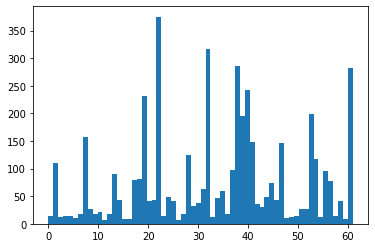

In [10]:
plt.hist(labels, len(set(labels)))
plt.show()

In [11]:
import random

In [12]:
rand_signs = random.sample(range(0, len(labels)), 6)
rand_signs

[2420, 2468, 3204, 364, 3660, 4548]

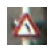

Forma:(29, 30, 3), min:26, max:255


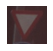

Forma:(83, 87, 3), min:32, max:112


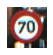

Forma:(51, 49, 3), min:0, max:255


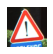

Forma:(133, 130, 3), min:0, max:255


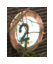

Forma:(187, 148, 3), min:6, max:255


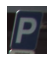

Forma:(99, 82, 3), min:10, max:255


In [13]:
for i in range(len(rand_signs)):
    temp_im = images[rand_signs[i]]
    plt.subplot(1,6,i+1)
    plt.axis("off")
    plt.imshow(temp_im)
    plt.subplots_adjust(wspace = 0.5)
    plt.show()
    print("Forma:{0}, min:{1}, max:{2}".format(temp_im.shape,
                                               temp_im.min(),
                                               temp_im.max()))

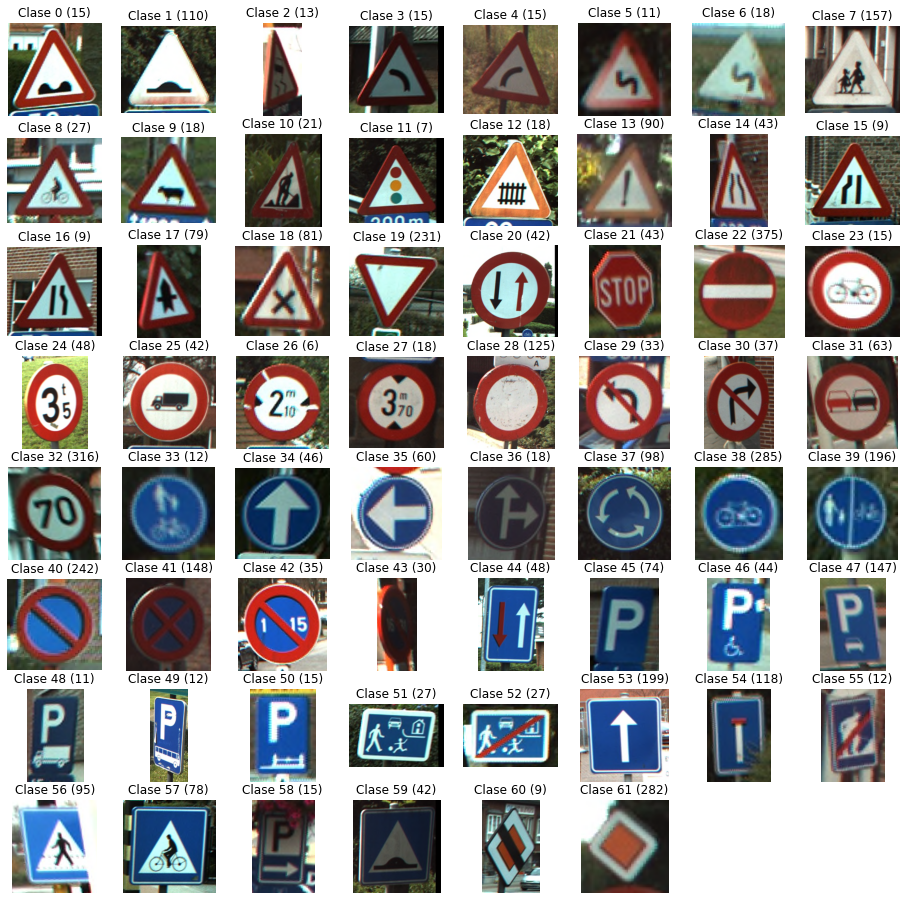

In [14]:
unique_labels = set(labels)
plt.figure(figsize=(16,16))
i = 1
for label in unique_labels:
    temp_im = images[list(labels).index(label)]
    plt.subplot(8,8, i)
    plt.axis("off")
    plt.title("Clase {0} ({1})".format(label, list(labels).count(label)))
    i +=1
    plt.imshow(temp_im)
plt.show()

# Modelo de Red Neuronal con TensorFlow
* Las imágenes no todas son del mismo tamaño
* Hay 62 clases de imágenes (desde la 0 hasta la 61)
* La distribución de señales de tráfico no es uniforme (algunas salen más veces que otras)

In [15]:
from skimage import transform

In [16]:
w = 9999 
h = 9999
for image in images:
    if image.shape[0] < h:
        h = image.shape[0]
    if image.shape[1] < w:
        w = image.shape[1]
print("Tamaño mínimo: {0}x{1}".format(h,w))

Tamaño mínimo: 22x20


In [17]:
images30 = [transform.resize(image, (30,30)) for image in images]

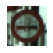

Forma:(30, 30, 3), min:0.04888997821350767, max:0.996078431372549


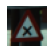

Forma:(30, 30, 3), min:0.023284313725490224, max:0.7975816993464055


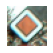

Forma:(30, 30, 3), min:0.027058823529411923, max:0.996078431372549


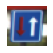

Forma:(30, 30, 3), min:0.09388235294117647, max:0.996078431372549


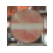

Forma:(30, 30, 3), min:0.14921568627450973, max:0.9872549019607844


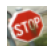

Forma:(30, 30, 3), min:0.06274509803921569, max:0.9921568627450981


In [18]:
rand_signs = random.sample(range(0, len(labels)), 6)
rand_signs
for i in range(len(rand_signs)):
    temp_im = images30[rand_signs[i]]
    plt.subplot(1,6,i+1)
    plt.axis("off")
    plt.imshow(temp_im)
    plt.subplots_adjust(wspace = 0.5)
    plt.show()
    print("Forma:{0}, min:{1}, max:{2}".format(temp_im.shape,
                                               temp_im.min(),
                                               temp_im.max()))

In [19]:
from skimage.color import rgb2gray

In [20]:
images30 = np.array(images30)
images30 = rgb2gray(images30)

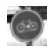

Forma:(30, 30), min:0.1576522385620914, max:0.9956012418300655


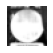

Forma:(30, 30), min:0.14967803921568623, max:0.996078431372549


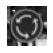

Forma:(30, 30), min:0.08109147843137267, max:0.725529056209151


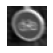

Forma:(30, 30), min:0.050789973856209265, max:0.9579504686274508


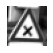

Forma:(30, 30), min:0.06417101350762557, max:0.9945953973856209


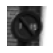

Forma:(30, 30), min:0.043072776470588124, max:0.9771067973856209


In [21]:
rand_signs = random.sample(range(0, len(labels)), 6)
rand_signs
for i in range(len(rand_signs)):
    temp_im = images30[rand_signs[i]]
    plt.subplot(1,6,i+1)
    plt.axis("off")
    plt.imshow(temp_im, cmap="gray")
    plt.subplots_adjust(wspace = 0.5)
    plt.show()
    print("Forma:{0}, min:{1}, max:{2}".format(temp_im.shape,
                                               temp_im.min(),
                                               temp_im.max()))

In [22]:
x = tf.placeholder(dtype = tf.float32, shape = [None, 30,30])
y = tf.placeholder(dtype = tf.int32, shape = [None])

images_flat = tf.contrib.layers.flatten(x)
logits = tf.contrib.layers.fully_connected(images_flat, 62, tf.nn.relu)

loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits=logits))

train_opt = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

final_pred = tf.argmax(logits,1)

accuracy = tf.reduce_mean(tf.cast(final_pred, tf.float32))

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.


In [23]:
tf.set_random_seed(1234)

sess = tf.Session()

sess.run(tf.global_variables_initializer())


for i in range(10000):
    
    _, accuracy_val = sess.run([train_opt, accuracy],
                              feed_dict= {
                                  x: images30,
                                  y: list(labels)
                              })
    _, loss_val = sess.run([train_opt, loss],
                              feed_dict= {
                                  x: images30,
                                  y: list(labels)
                              })
    if i%50 == 0:
        print("EPOCH", i)
        print("Eficacia: ", accuracy_val)
        print("Pérdidas:", loss_val)

EPOCH 0
Eficacia:  8.786667
Pérdidas: 4.0514765
EPOCH 50
Eficacia:  33.617924
Pérdidas: 2.3968217
EPOCH 100
Eficacia:  33.369617
Pérdidas: 2.0897326
EPOCH 150
Eficacia:  33.326775
Pérdidas: 1.935349
EPOCH 200
Eficacia:  33.238907
Pérdidas: 1.8374362
EPOCH 250
Eficacia:  33.069073
Pérdidas: 1.7682583
EPOCH 300
Eficacia:  32.983826
Pérdidas: 1.716099
EPOCH 350
Eficacia:  32.865135
Pérdidas: 1.6750183
EPOCH 400
Eficacia:  32.7847
Pérdidas: 1.6415839
EPOCH 450
Eficacia:  32.682186
Pérdidas: 1.6136397
EPOCH 500
Eficacia:  32.523933
Pérdidas: 1.5898125
EPOCH 550
Eficacia:  32.44459
Pérdidas: 1.5691386
EPOCH 600
Eficacia:  32.345573
Pérdidas: 1.5509666
EPOCH 650
Eficacia:  32.22492
Pérdidas: 1.5348068
EPOCH 700
Eficacia:  32.085903
Pérdidas: 1.5202805
EPOCH 750
Eficacia:  31.978361
Pérdidas: 1.5071303
EPOCH 800
Eficacia:  31.890928
Pérdidas: 1.4951509
EPOCH 850
Eficacia:  31.791912
Pérdidas: 1.4841725
EPOCH 900
Eficacia:  31.618797
Pérdidas: 1.4740512
EPOCH 950
Eficacia:  31.554317
Pérdidas: 

EPOCH 8000
Eficacia:  24.994972
Pérdidas: 1.2863824
EPOCH 8050
Eficacia:  23.945574
Pérdidas: 1.2863544
EPOCH 8100
Eficacia:  24.162405
Pérdidas: 1.2863334
EPOCH 8150
Eficacia:  24.743826
Pérdidas: 1.2863216
EPOCH 8200
Eficacia:  24.22776
Pérdidas: 1.2862982
EPOCH 8250
Eficacia:  23.582077
Pérdidas: 1.2862839
EPOCH 8300
Eficacia:  24.32153
Pérdidas: 1.2862582
EPOCH 8350
Eficacia:  23.718689
Pérdidas: 1.2862345
EPOCH 8400
Eficacia:  23.798906
Pérdidas: 1.2862169
EPOCH 8450
Eficacia:  24.127213
Pérdidas: 1.2862012
EPOCH 8500
Eficacia:  23.878906
Pérdidas: 1.2861888
EPOCH 8550
Eficacia:  24.061857
Pérdidas: 1.2861718
EPOCH 8600
Eficacia:  25.032787
Pérdidas: 1.2861559
EPOCH 8650
Eficacia:  24.316065
Pérdidas: 1.2861291
EPOCH 8700
Eficacia:  23.7506
Pérdidas: 1.2861284
EPOCH 8750
Eficacia:  23.791039
Pérdidas: 1.2861016
EPOCH 8800
Eficacia:  23.608524
Pérdidas: 1.2860868
EPOCH 8850
Eficacia:  24.291803
Pérdidas: 1.2860819
EPOCH 8900
Eficacia:  24.120655
Pérdidas: 1.2860534
EPOCH 8950
Efica